## Wine testing model
Three different classes of wine makers. Can you build a model using data science? A model takes the inputs of the various parameters of the wine and predict the classes of wine makers.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [2]:
wine_df = pd.read_csv("wine.data.csv")

In [3]:
wine_df.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [7]:
wine_df = wine_df.rename(columns={'Malic acid': 'Malic_acid', 'Alcalinity of ash': 'Alcalinity_of_ash',
                        'Total phenols': 'Total_phenols', 'Nonflavanoid phenols': 'Nonflavanoid_phenols', 
                        'Color intensity': 'Color_intensity','OD280/OD315 of diluted wines': 'OD280'})
wine_df.head()

Class  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280  Proline  
0             5.64  1.04   3.92     1065  
1             4.38  1.05   3.40     1050  
2             5.68  1.03   3.17     1185  
3             7.80  0.86   3.45     1480  
4             4.32  1.04   2.93      735

In [9]:
wine_df.describe().transpose()

count        mean         std     min       25%  \
Class                 178.0    1.938202    0.775035    1.00    1.0000   
Alcohol               178.0   13.000618    0.811827   11.03   12.3625   
Malic_acid            178.0    2.336348    1.117146    0.74    1.6025   
Ash                   178.0    2.366517    0.274344    1.36    2.2100   
Alcalinity_of_ash     178.0   19.494944    3.339564   10.60   17.2000   
Magnesium             178.0   99.741573   14.282484   70.00   88.0000   
Total_phenols         178.0    2.295112    0.625851    0.98    1.7425   
Flavanoids            178.0    2.029270    0.998859    0.34    1.2050   
Nonflavanoid_phenols  178.0    0.361854    0.124453    0.13    0.2700   
Proanthocyanins       178.0    1.590899    0.572359    0.41    1.2500   
Color_intensity       178.0    5.058090    2.318286    1.28    3.2200   
Hue                   178.0    0.957449    0.228572    0.48    0.7825   
OD280                 178.0    2.611685    0.709990    1.27    1.9375   
Proline               178.0  746.893258  314.907474  278.00  500.5000   

                          50%       75%      max  
Class                   2.000    3.0000     3.00  
Alcohol                13.050   13.6775    14.83  
Malic_acid              1.865    3.0825     5.80  
Ash                     2.360    2.5575     3.23  
Alcalinity_of_ash      19.500   21.5000    30.00  
Magnesium              98.000  107.0000   162.00  
Total_phenols           2.355    2.8000     3.88  
Flavanoids              2.135    2.8750     5.08  
Nonflavanoid_phenols    0.340    0.4375     0.66  
Proanthocyanins         1.555    1.9500     3.58  
Color_intensity         4.690    6.2000    13.00  
Hue                     0.965    1.1200     1.71  
OD280                   2.780    3.1700     4.00  
Proline               673.500  985.0000  1680.00

In [11]:
wine_df.columns

Index(['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

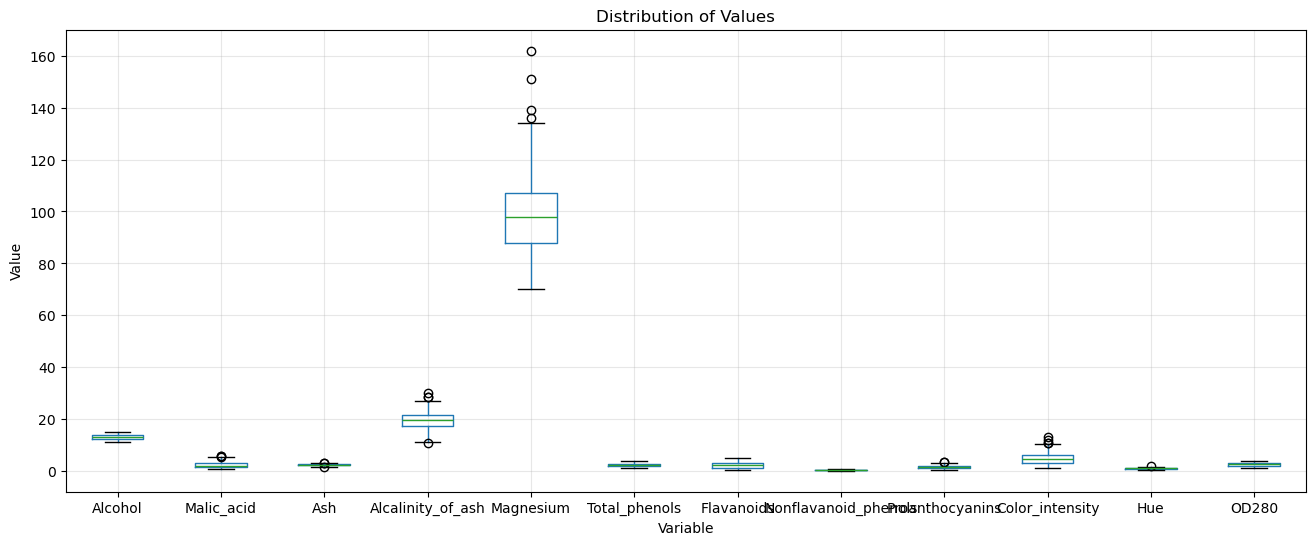

In [19]:
data_to_plot = wine_df[['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280']] 
fig, ax = plt.subplots(figsize=(16, 6))
data_to_plot.boxplot(ax=ax)
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Distribution of Values')
plt.grid(alpha=0.3)
plt.show()

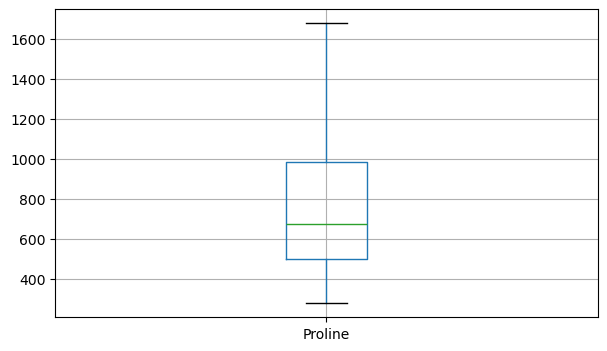

In [23]:
data_to_plot1 = wine_df[['Proline']] 
fig, ax1 = plt.subplots(figsize=(7, 4))
data_to_plot1.boxplot(ax=ax1)
plt.show()

In [25]:
wine_df.dtypes

Class                     int64
Alcohol                 float64
Malic_acid              float64
Ash                     float64
Alcalinity_of_ash       float64
Magnesium                 int64
Total_phenols           float64
Flavanoids              float64
Nonflavanoid_phenols    float64
Proanthocyanins         float64
Color_intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

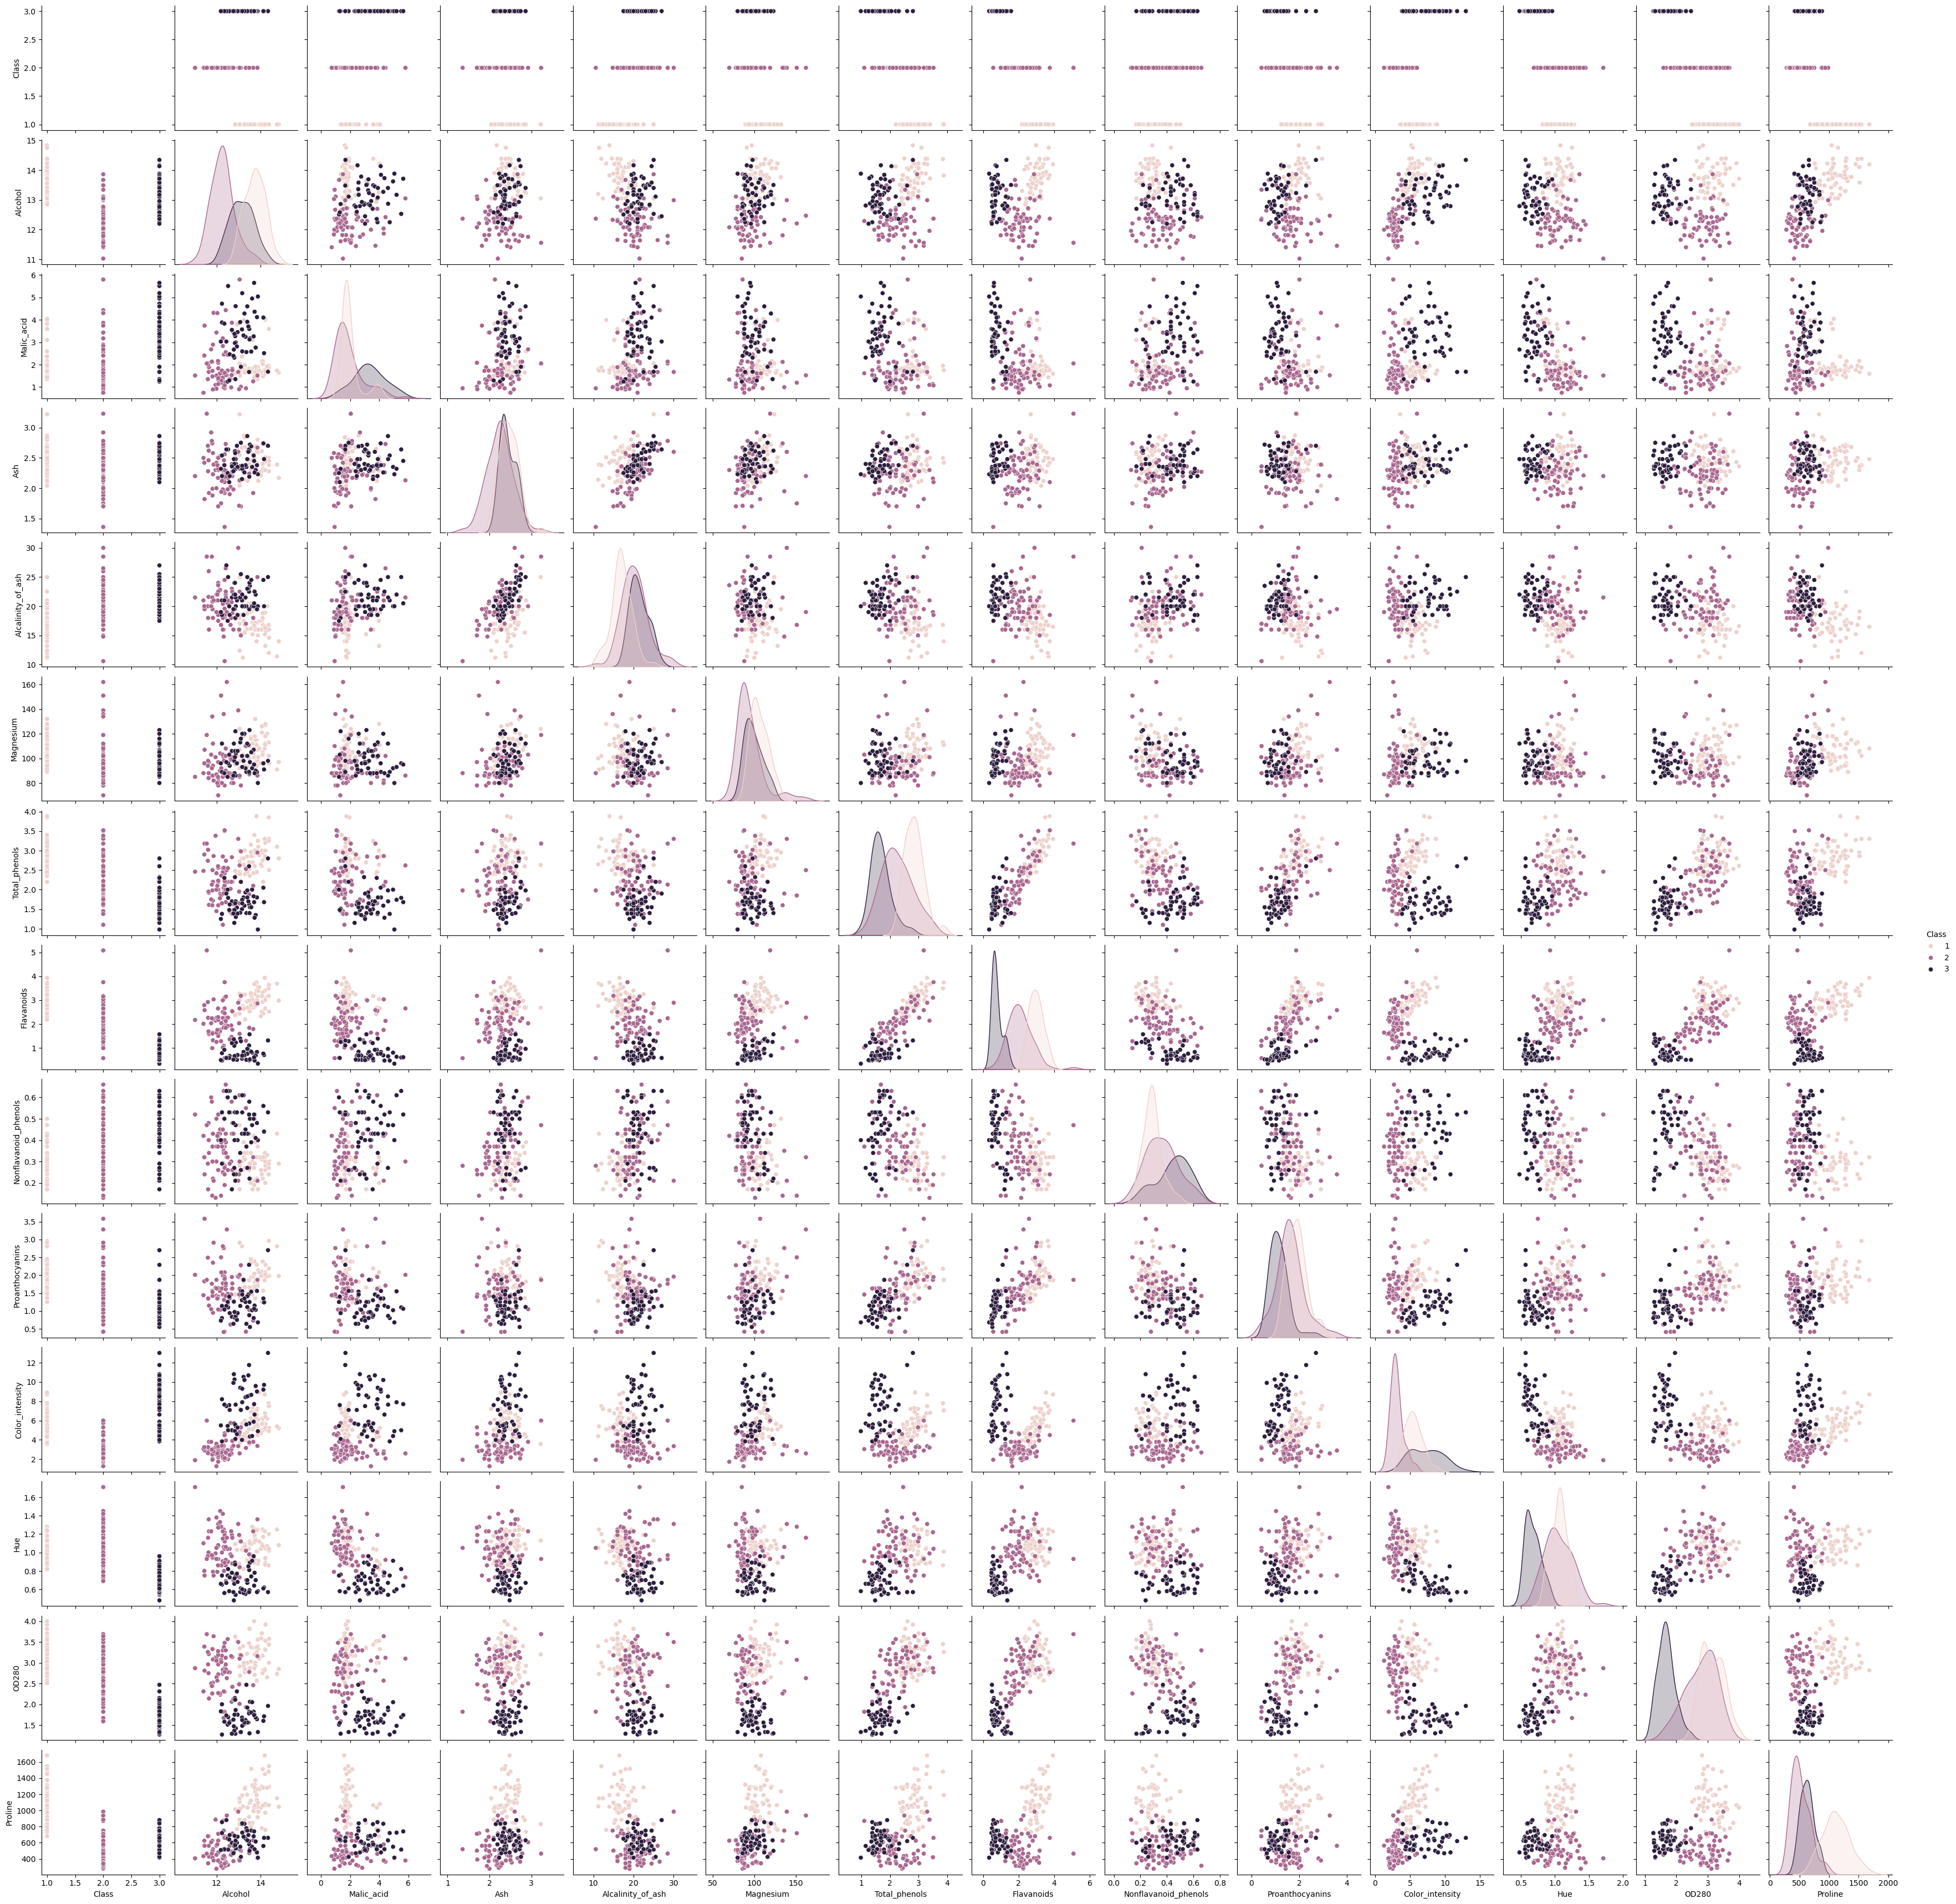

In [31]:
sns.pairplot(wine_df, vars=['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 
                            'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols','Proanthocyanins', 
                            'Color_intensity', 'Hue', 'OD280', 'Proline'], diag_kind='kde', hue = 'Class')
plt.show()

##### Observations: Means of the variables (except "Ash') are not overlapping for three classes. It helps to distinguish the classes.

In [33]:
# Set chose the model variuables and target
X = wine_df.drop("Class", axis=1) # Features
y = wine_df.pop("Class") # target

In [35]:
X.head()

Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   
3    14.37        1.95  2.50               16.8        113           3.85   
4    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [37]:
#Spliting the data into training and test sets
from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size = 0.3, random_state=1)

In [39]:
#Fit the model using the training dataset
model = GaussianNB()
model.fit(train_set, train_labels)

GaussianNB()

In [41]:
model_score = model.score(train_set, train_labels)
model_score

0.9758064516129032

In [43]:
test_pred=model.predict(test_set)
print(metrics.classification_report(test_labels,test_pred))
cm = metrics.confusion_matrix(test_labels,test_pred)
cmdf = pd.DataFrame(cm, index=['Class 1', 'Class 2', 'Class 3'], columns =['Class 1', 'Class 2', 'Class 3'])
cmdf     

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



Class 1  Class 2  Class 3
Class 1       23        0        0
Class 2        1       18        0
Class 3        0        0       12

In [ ]:
# How the cross-validation technique works
# cross-validation when k = 10, break the data into 10 equal pieces. 
# for i =1, 10
#fit the model using 9 and test/predict using the left out and repeat 10 times

#### K-Fold Cross Validation -- use this technique when number of data points is less

#### Take average of scores to get overall average

In [55]:
from sklearn.model_selection import cross_val_score, cross_val_predict

scores = cross_val_score(model, train_set, train_labels, cv =10)
print("Cross-validation scores:", scores)
print("Average score:" , np.average(scores))

Cross-validation scores: [1.         0.92307692 1.         1.         0.91666667 1.
 0.91666667 1.         1.         0.91666667]
Average score: 0.9673076923076922


##### - Find data, contact all the stakeholders(e.g., within organization, outside the organization, customer) to get data
##### - Estiblish the relability of the data
##### - Do the analysis with the various attributes of the data
##### - Project starts with customer requirements, turned into technical requirements, then turn into design requirements, then turns into code space
##### - unit testing, integration testing and finally acceptance testing
##### - data visualization and storytelling using the data

#### When building a build model, which is put into production, what is the model's performance? Give accuracy as a range
##### - What is the performance except for the model, which  never gives a point estimate instead gives a range. 
##### - Confidence level estimate - confidence measure at 95%. With 95% confidence, the model will give an accuracy between x and y.
##### - Use the technique called "bootstrap" sampling (in statistics known as sampling with replacements)
##### - Tecnique: k-fold cross validations

In [ ]:
#If you remove the outliers than logistic and gaussian naive bayes will give good results

#### Why is the estimated model accuracy using the training and test datasets
##### - overfit (training accuracy/error is high and test accuracy is low)  and underfit (training accuracy/error is low and test accuracy is low)
##### - training error decreases as the complexity of the model increases, but for the test data, error decreases with the complexity of the model, and then start increasing 
##### - With model complexity, the bias error decreases, but the variance increases.

In [ ]:
Problem statments:
1. for normalized (e.g., Z-score) first split the data and then applied z-score to the training and test data seperate otherwise data leaking occurs
2. For one hot coding, applied to the data first and then seperate training and test data sets

###### Build multiple models with different algorithm, average out --the concept called stacking
###### Use the same algorithm multiple instances called Ensemble
###### Ensemble learning is a machine learning technique that aggregates two or more learners (e.g. regression models, neural networks) in order to produce better predictions. In other words, an ensemble model combines several individual models to produce more accurate predictions than a single model alone.
###### It will give much better results during production than a single instance.

##### For pair plot always look at the diagonal. Between class there is overall however the central value do not overlap. 
##### - Alchol diamension can be used to seperate classes
##### - For Malic Acid, outliers for Class 1 & 2 (check the data set) and for Class 3, extrme values on both sides and the diffitribution is streched out
##### - for Ash is not very useful, and may be dropping ash from the model will increase the model accuracy
##### - Handling outliers will give better results.

#### Data Leaks
##### - For z-score, split the training and test set and then apply z-score
##### - for one-hot coding, applied one-hot coding, then split the train and test data
##### - Problem with collinearity (In statistics, collinearity refers to a linear relationship between two explanatory variables) when we applied one hot coding to two create two columns from One original one-column dataset
##### To address the collinearity, we may drop one of the columns.